# Project Introduction: Churn Analysis for a Telecom Company

Customer churn is a critical issue for telecom companies, as retaining existing customers is often more cost-effective than acquiring new ones. This project aims to analyze and predict customer churn for a fictional telecom company, "TeleComX," which has been facing increasing customer attrition over the past year. By identifying the key factors driving customer churn and predicting which customers are likely to leave, TeleComX can take targeted actions to improve customer retention.

The project will involve data analysis and modeling techniques to understand the customer behaviors and service features associated with churn. We will explore a variety of features such as customer demographics, service usage patterns, and account information to determine the factors that contribute most significantly to churn. The ultimate goal is to develop a predictive model that accurately identifies at-risk customers, enabling TeleComX to implement proactive retention strategies.

This analysis will provide valuable insights to reduce churn rates, enhance customer satisfaction, and increase overall profitability.


# Import Libraries

In [21]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Geospatial data
import geopandas as gpd

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model selection and evaluation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Seaborn settings
sns.set()
sns.set_context("talk")

# Centering output for IPython display
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


# Load Data

In [2]:
file_path = 'Churn.csv'
df = pd.read_csv(file_path, skiprows=1)

# Basic Exploration

In [3]:
df.head(5)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

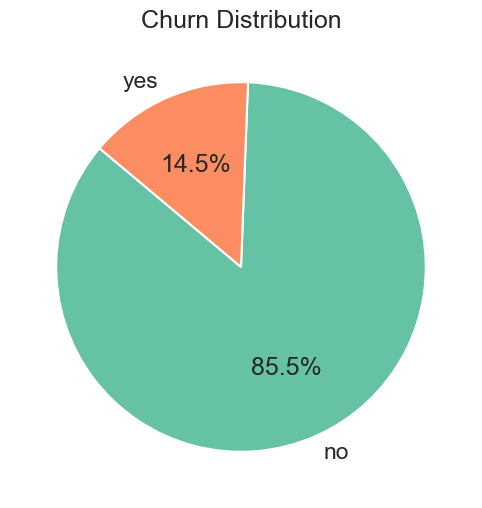

In [5]:
# Get the value counts for the 'Churn' column
churn_counts = df['Churn'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
plt.title('Churn Distribution')
plt.show()

The churn dataset exhibits a significant imbalance between the classes. When we analyze the distribution of the target variable, `Churn`, we observe that the majority of the data points belong to one class (e.g., "no churn"), while the minority class (e.g., "churn") is underrepresented.

This imbalance can pose challenges when building predictive models, as algorithms may become biased towards the majority class, leading to poor predictive performance on the minority class. Techniques such as resampling, cost-sensitive learning, or using metrics like precision, recall, and F1-score are often employed to address this issue.

# Exploratory Analysis


### Do churners call customer service more often?


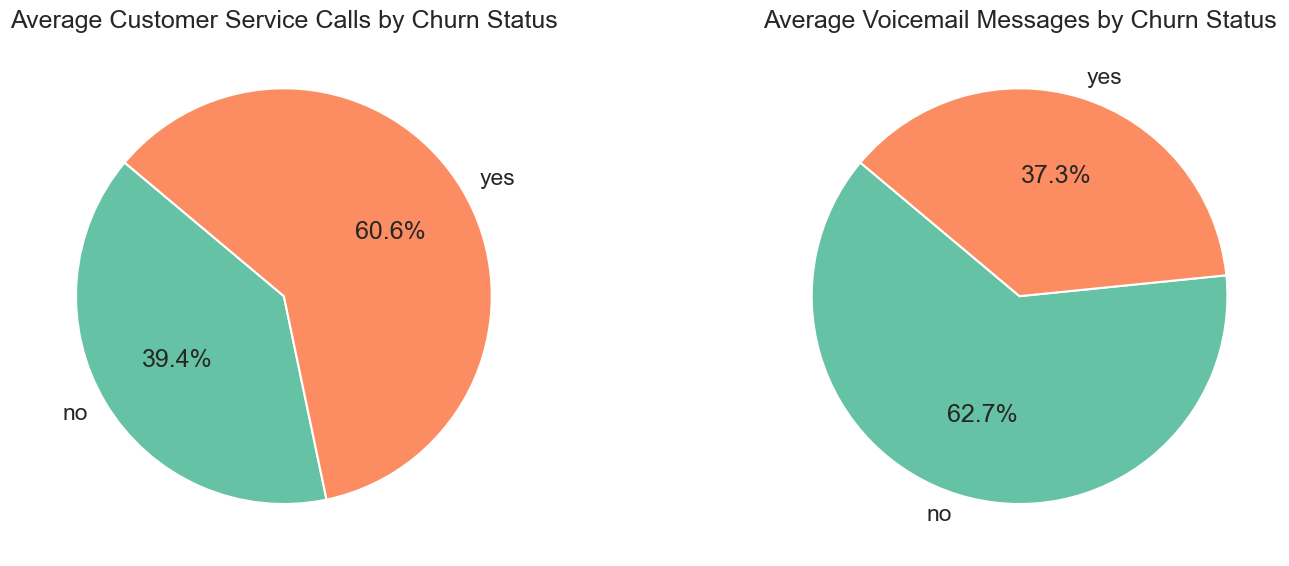

In [6]:
# Data for average customer service calls and voicemail messages
mean_service_calls = df.groupby(['Churn'])['CustServ_Calls'].mean()
mean_service_messages = df.groupby(['Churn'])['Vmail_Message'].mean()

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart for average customer service calls
axes[0].pie(mean_service_calls, labels=mean_service_calls.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
axes[0].set_title('Average Customer Service Calls by Churn Status')

# Pie chart for average voicemail messages
axes[1].pie(mean_service_messages, labels=mean_service_messages.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
axes[1].set_title('Average Voicemail Messages by Churn Status')

# Display the plots
plt.tight_layout()
plt.show()

Unprisingly, Churners make more customer service calls than non-churners

Text(0.5, 1.0, 'Percentage of Churned Customers by State')

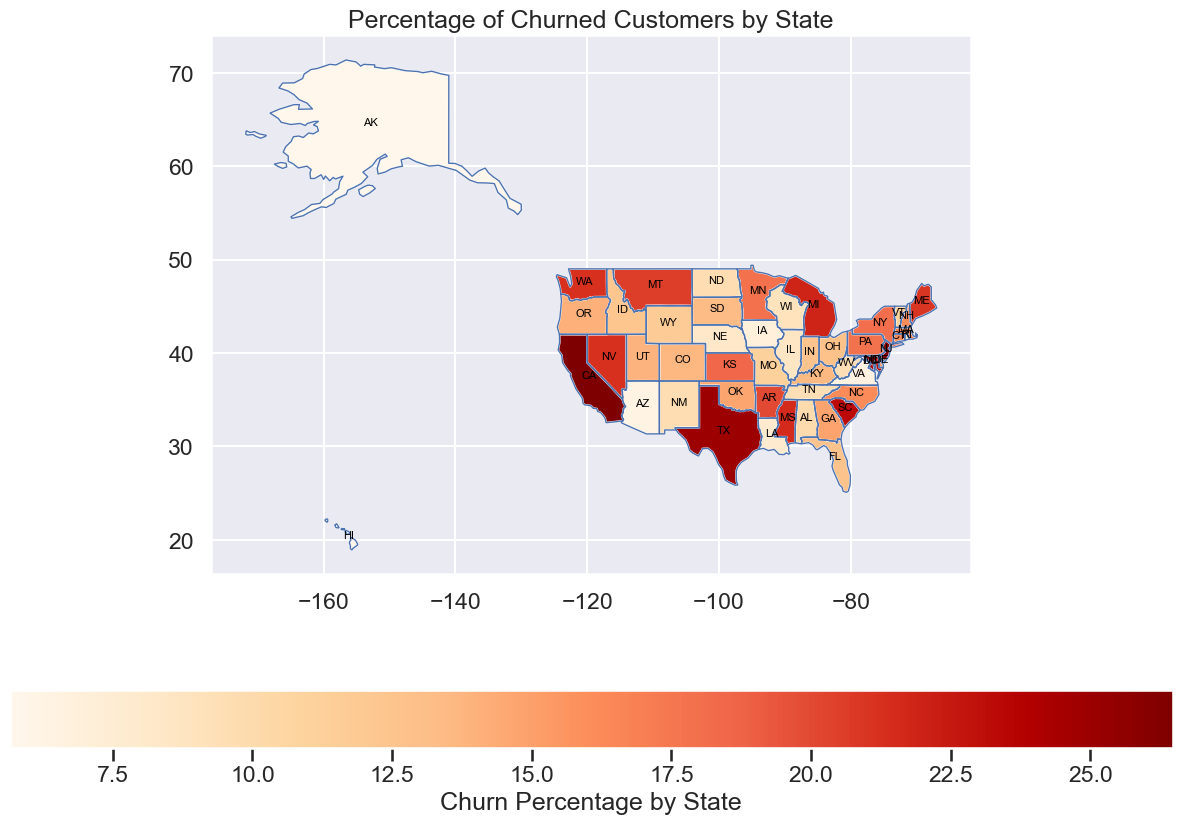

In [7]:
# Calculate the percentage of churned customers by state
churn_by_state = df.groupby('State')['Churn'].apply(lambda x: (x == 'yes').mean() * 100).reset_index()
churn_by_state.columns = ['State', 'Churn_Percentage']

# Load a map of the United States (you can download a shapefile for US states if you don't have it)
us_map = gpd.read_file('ne_110m_admin_1_states_provinces.shp')
us_map['State'] = us_map['iso_3166_2'].str.replace('US-', '')

# Merge the churn data with the map data
us_map = us_map.merge(churn_by_state, left_on='State', right_on='State', how='left')

# Plot the map with the churn percentage
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
us_map.boundary.plot(ax=ax, linewidth=1)
us_map.plot(column='Churn_Percentage', ax=ax, legend=True,
            legend_kwds={'label': "Churn Percentage by State", 'orientation': "horizontal"},
            cmap='OrRd', missing_kwds={"color": "lightgrey"})

# Add state names as labels
for idx, row in us_map.iterrows():
    plt.annotate(text=row['State'], xy=row['geometry'].centroid.coords[0], 
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Percentage of Churned Customers by State')

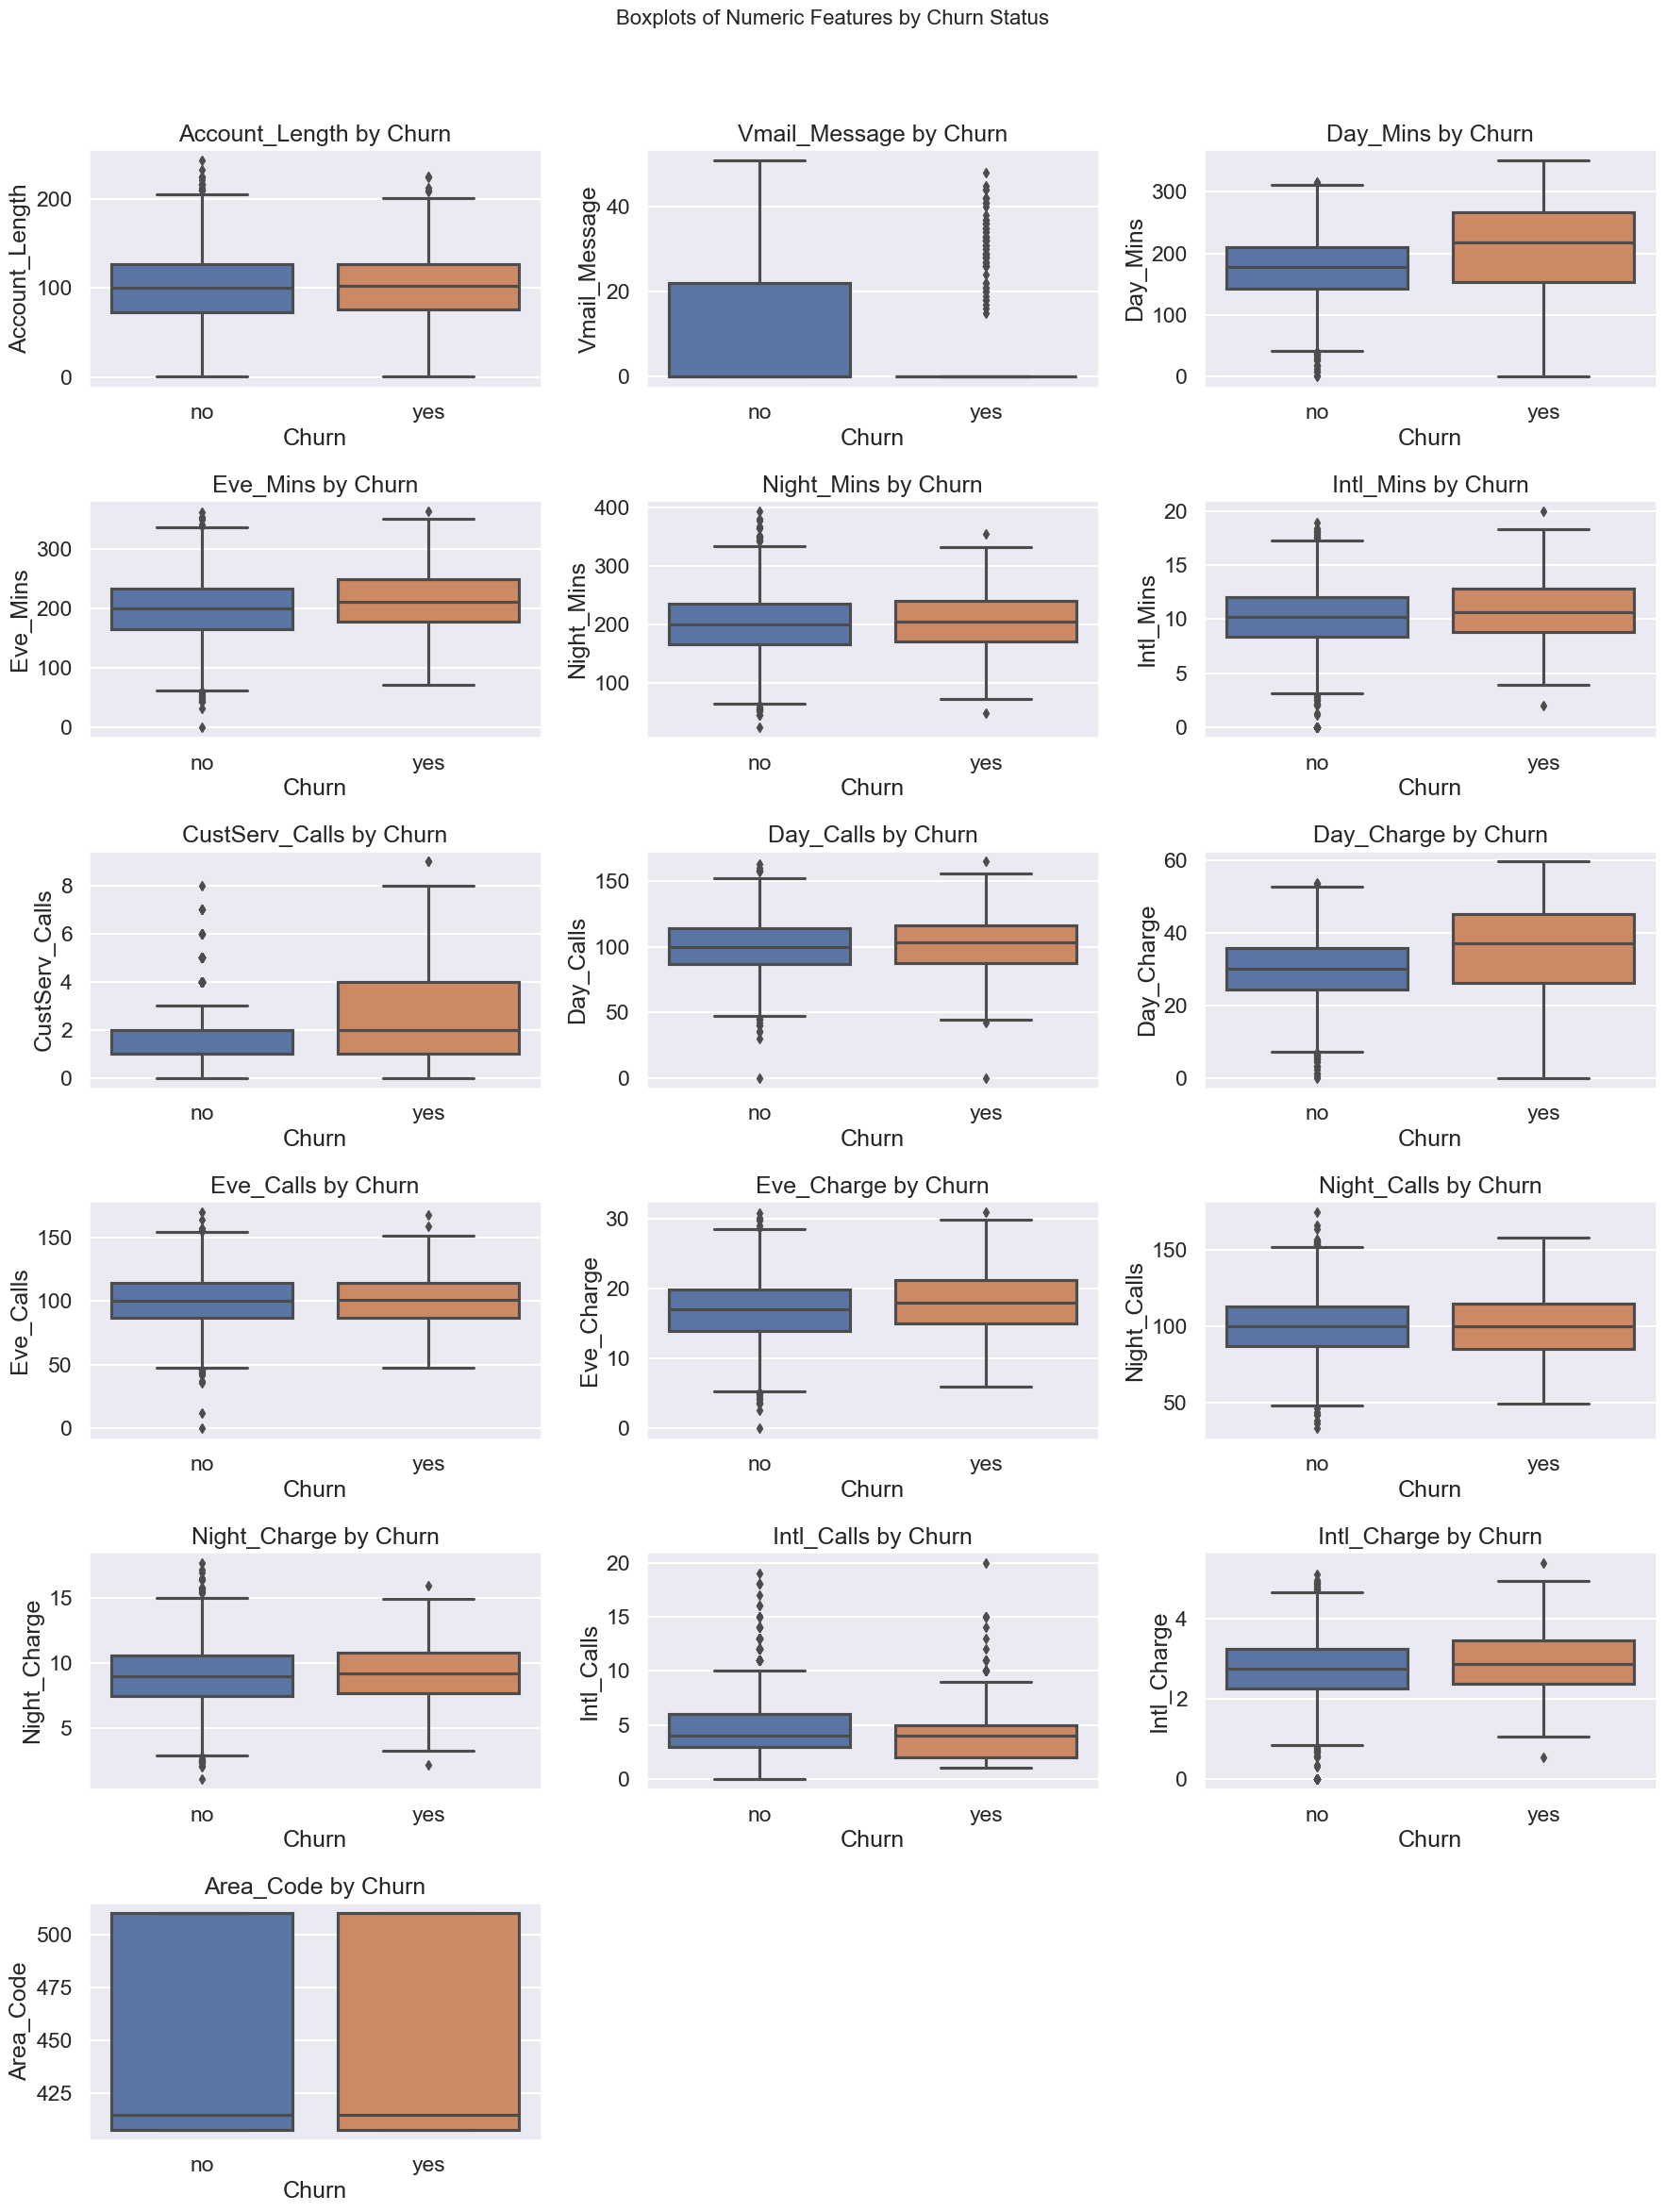

In [8]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Create a figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.suptitle('Boxplots of Numeric Features by Churn Status', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns):
    sns.boxplot(x='Churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Churn')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\gran-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gran-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gran-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gran-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

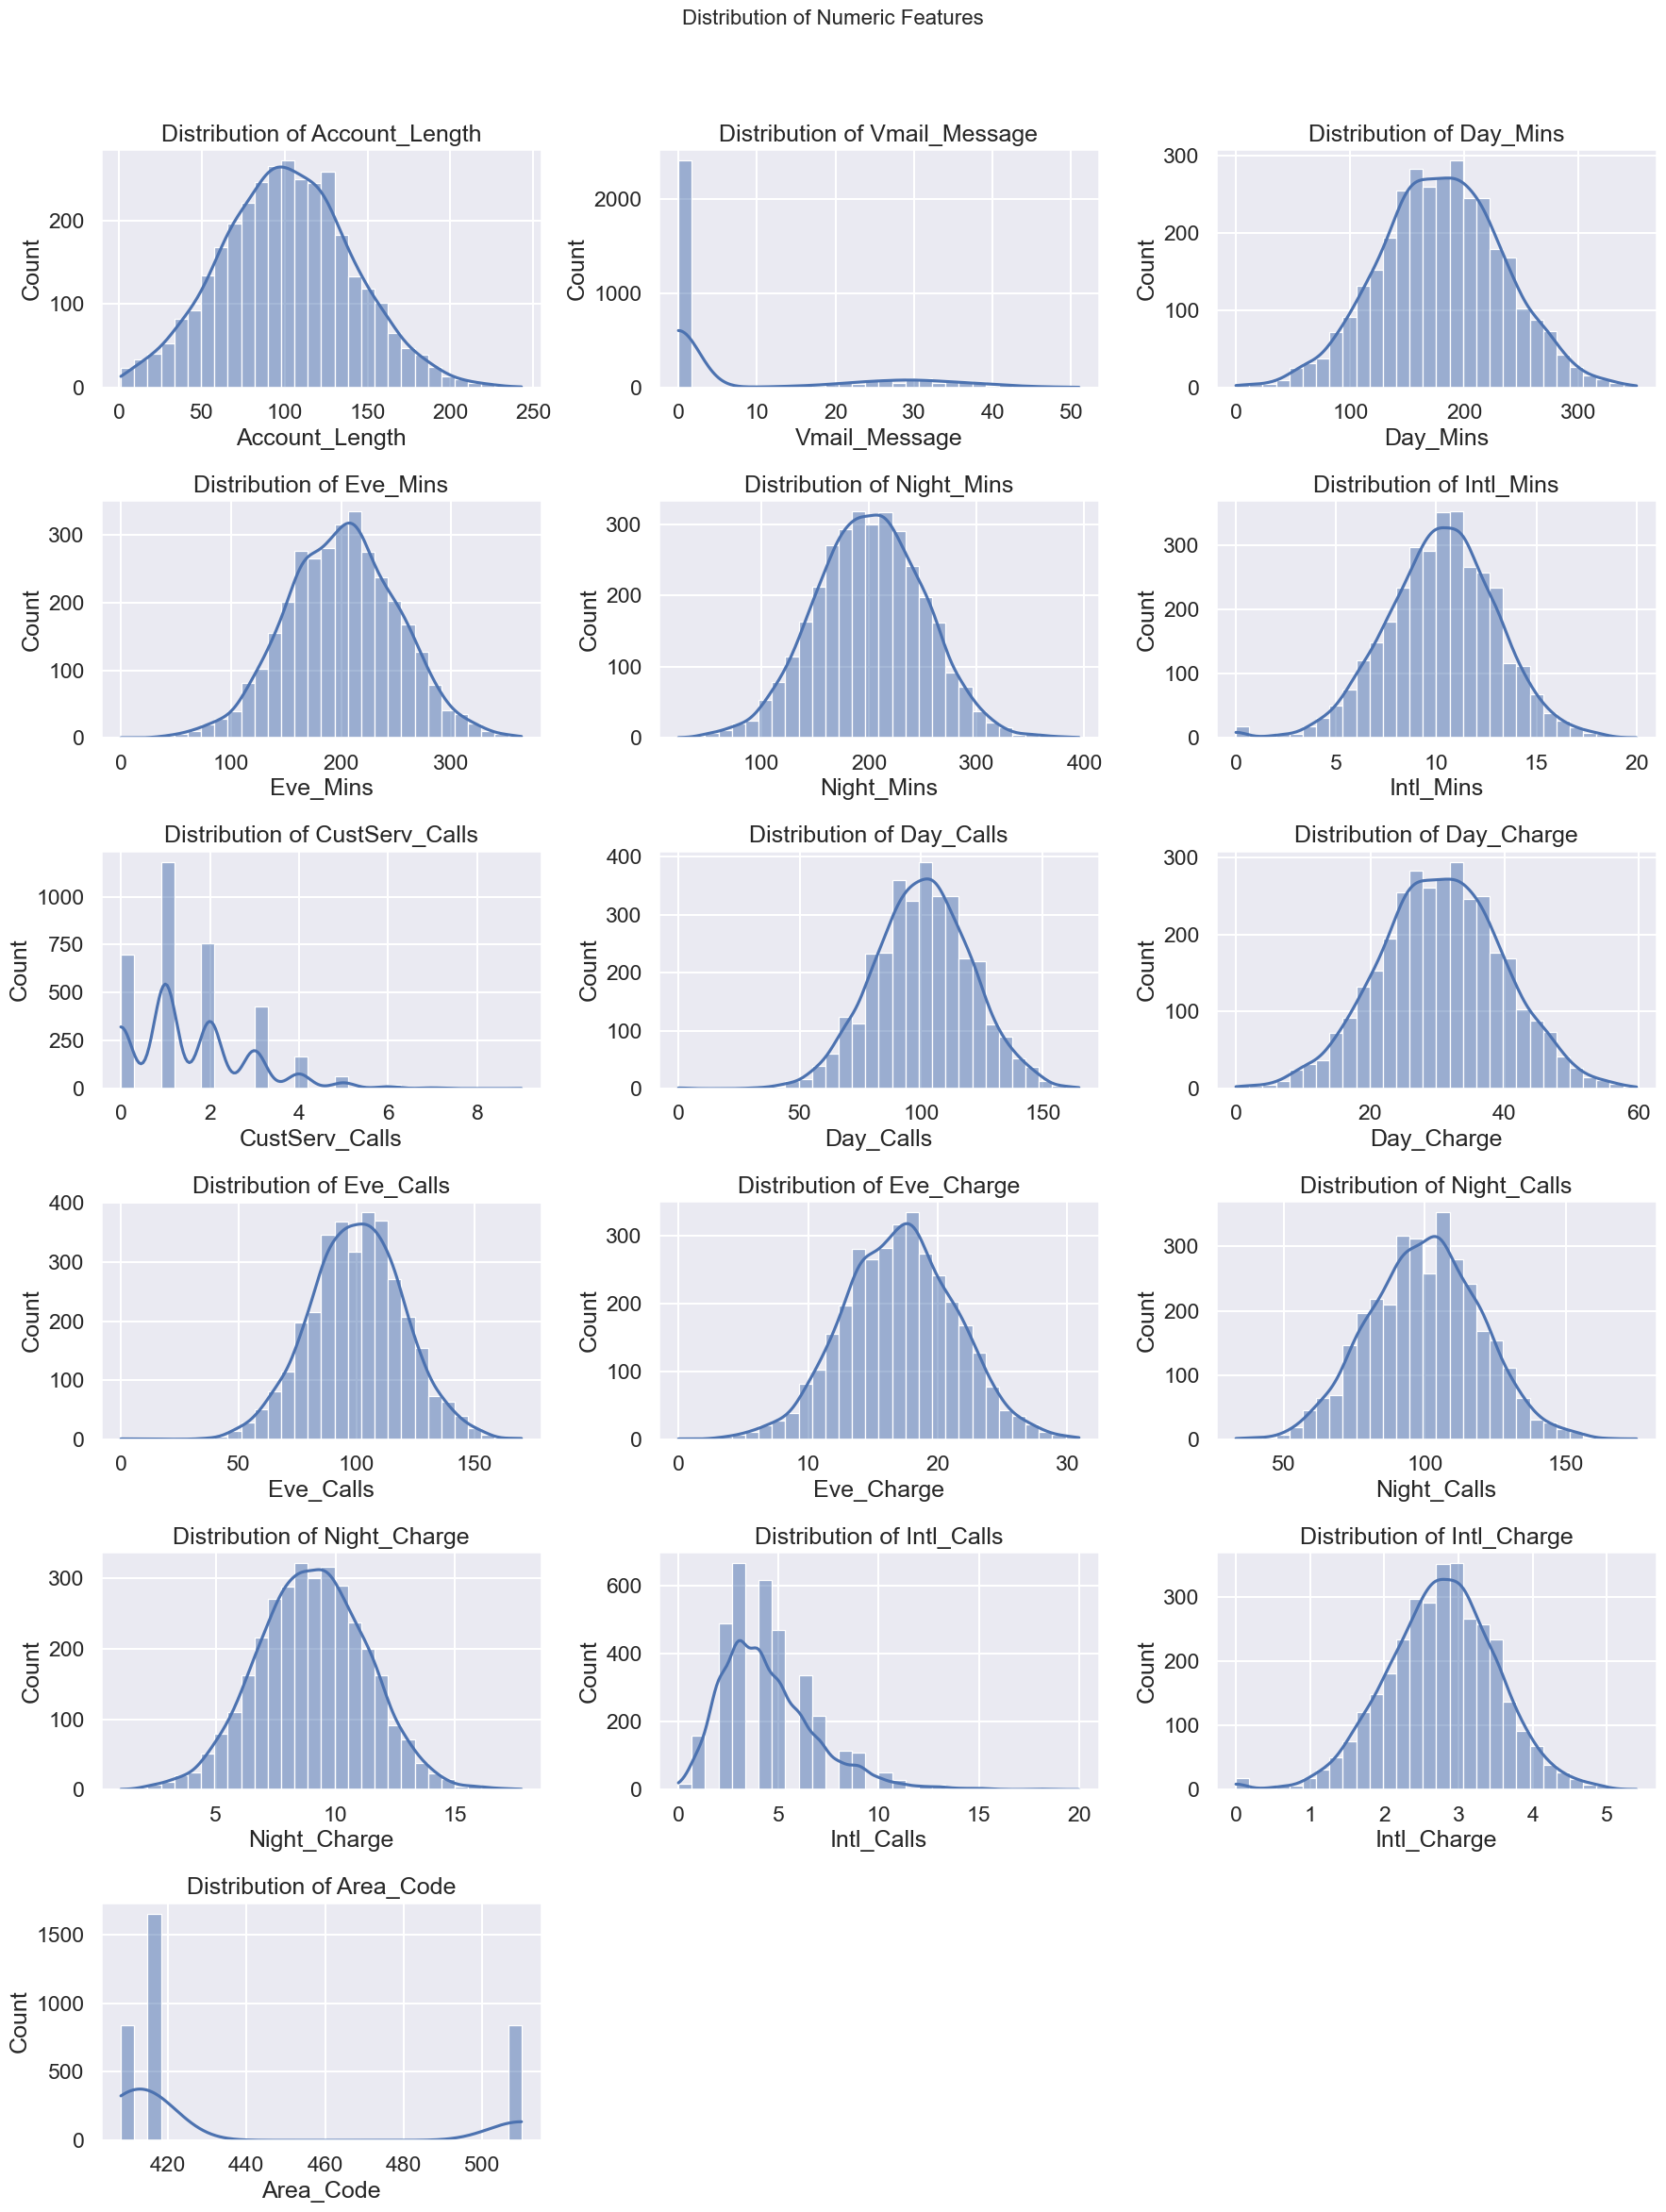

In [9]:
# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

# Create a figure with multiple subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
fig.suptitle('Distribution of Numeric Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numeric column and create a distribution plot
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # Using sns.histplot as sns.distplot is deprecated
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

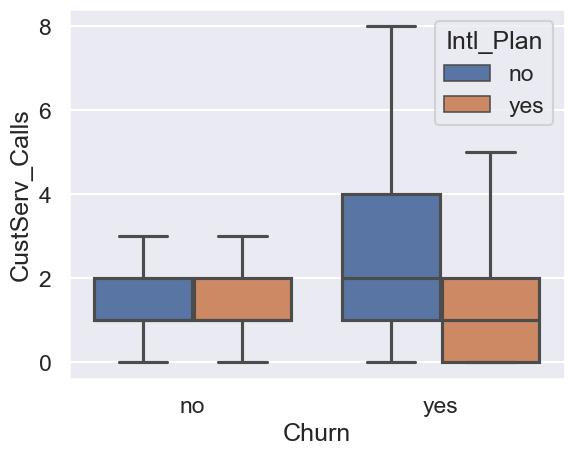

In [10]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = df,
            sym = "",
            hue = "Intl_Plan")

# Display the plot
plt.show()

 It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls.

# Data Preparation

In [11]:
df['Intl_Plan'] = LabelEncoder().fit_transform(df['Intl_Plan'])
df['Vmail_Plan'] = LabelEncoder().fit_transform(df['Vmail_Plan'])
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

In [12]:
df.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [13]:
df_model = pd.get_dummies(df, columns=['State'], prefix='State')
df_model.head(3)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [14]:
df_model.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'Area_Code', 'Phone',
       'State_AK', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO',
       'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI',
       'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY',
       'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN',
       'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE',
       'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD',
       'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
       'State_WI', 'State_WV', 'State_WY'],
      dtype='object'

In [15]:
df_model = df_model.drop(['Phone','Area_Code'], axis = 1)

In [16]:
columns = df_model.columns
columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID',
       'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA',
       'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS',
       'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ',
       'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR',
       'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX',
       'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV',
       'State_WY'],
      dtype='object')

In [17]:
df_model = pd.DataFrame(df_model, columns= columns)

In [18]:
df_model

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,...,False,False,False,False,False,False,False,False,False,False


# Model Selection

## Important Metrics for Churn Classification

For a churn classification problem, the most important metrics are typically **precision**, **recall**, and **F1-score**, especially for the churn class (customers who are likely to leave). Here's why:

1. **Recall**: Measures the model's ability to correctly identify actual churners. High recall ensures you catch most of the potential churners, which is critical for taking preventive actions.

2. **Precision**: Indicates how many of the predicted churners actually churn. High precision reduces the cost of false positives, ensuring resources are focused on customers who are more likely to churn.

3. **F1-score**: The harmonic mean of precision and recall. It balances the two metrics, making it suitable when both false positives and false negatives are important.

**Prioritizing recall** is often more crucial, as missing actual churners can be more damaging than acting on false alarms.

In [19]:
X = df_model.drop('Churn', axis = 1 )  
y = df_model['Churn']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# List of classifiers to try
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVC', SVC(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# DataFrame to store results for all models
results_df = pd.DataFrame()

# Loop over each classifier
for model_name, model in classifiers:
    # Lists to store metrics for each fold
    train_accuracy_scores = []
    val_accuracy_scores = []
    train_precision_scores = []
    val_precision_scores = []
    train_recall_scores = []
    val_recall_scores = []
    train_f1_scores = []
    val_f1_scores = []

    # Manually implementing cross-validation
    for train_index, val_index in kf.split(X_train_1):
        X_train, X_val = X_train_1[train_index], X_train_1[val_index]
        y_train, y_val = y_train_1.iloc[train_index], y_train_1.iloc[val_index]

        # Fit the model
        model.fit(X_train, y_train)

        # Predict on train and validation sets
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Calculate metrics for the train set
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_precision = precision_score(y_train, y_train_pred, average='weighted')
        train_recall = recall_score(y_train, y_train_pred, average='weighted')
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')

        # Calculate metrics for the validation set
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_precision = precision_score(y_val, y_val_pred, average='weighted')
        val_recall = recall_score(y_val, y_val_pred, average='weighted')
        val_f1 = f1_score(y_val, y_val_pred, average='weighted')

        # Append metrics to respective lists
        train_accuracy_scores.append(train_accuracy)
        val_accuracy_scores.append(val_accuracy)
        train_precision_scores.append(train_precision)
        val_precision_scores.append(val_precision)
        train_recall_scores.append(train_recall)
        val_recall_scores.append(val_recall)
        train_f1_scores.append(train_f1)
        val_f1_scores.append(val_f1)

    # Create a DataFrame to store the results for the current model
    model_results_df = pd.DataFrame({
        'Model Name': [model_name],
        'Average Train Accuracy': [np.mean(train_accuracy_scores)],
        'Std Train Accuracy': [np.std(train_accuracy_scores)],
        'Average Train Precision': [np.mean(train_precision_scores)],
        'Average Train Recall': [np.mean(train_recall_scores)],
        'Average Train F1': [np.mean(train_f1_scores)],
        'Average Val Accuracy': [np.mean(val_accuracy_scores)],
        'Std Val Accuracy': [np.std(val_accuracy_scores)],
        'Average Val Precision': [np.mean(val_precision_scores)],
        'Average Val Recall': [np.mean(val_recall_scores)],
        'Average Val F1': [np.mean(val_f1_scores)]
    })

    # Append the current model's results to the overall results DataFrame
    results_df = pd.concat([results_df, model_results_df], ignore_index=True)

# Display the results
results_df


,Model Name,Average Train Accuracy,Std Train Accuracy,Average Train Precision,Average Train Recall,Average Train F1,Average Val Accuracy,Std Val Accuracy,Average Val Precision,Average Val Recall,Average Val F1
0,Logistic Regression,0.872843,0.005327,0.851878,0.872843,0.850947,0.863089,0.016411,0.836166,0.863089,0.838144
1,Random Forest,1.000000,0.000000,1.000000,1.000000,1.000000,0.933610,0.007544,0.934564,0.933610,0.926379
2,SVC,0.893661,0.003219,0.905136,0.893661,0.865447,0.867219,0.021225,0.855678,0.867219,0.819481
3,K-Nearest Neighbors,0.873968,0.004100,0.873656,0.873968,0.832670,0.856338,0.015868,0.798842,0.856338,0.799595
4,Decision Tree,1.000000,0.000000,1.000000,1.000000,1.000000,0.910346,0.011384,0.911478,0.910346,0.910818
5,Naive Bayes,0.573242,0.097248,0.827894,0.573242,0.627743,0.541612,0.092355,0.791574,0.541612,0.601472


# Fine-Tuning

The power of GridSearchCV really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination. Here, you'll tune the following random forest hyperparameters:

In [24]:
# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "criterion": ["gini", "entropy"]}

clf = RandomForestClassifier(random_state=42)

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring = 'recall')

# Fit the model
grid_search.fit(X_train_1,y_train_1)

# Print the best hyperparameters
print(grid_search.best_params_) 

{'criterion': 'gini', 'max_depth': None, 'max_features': 10}


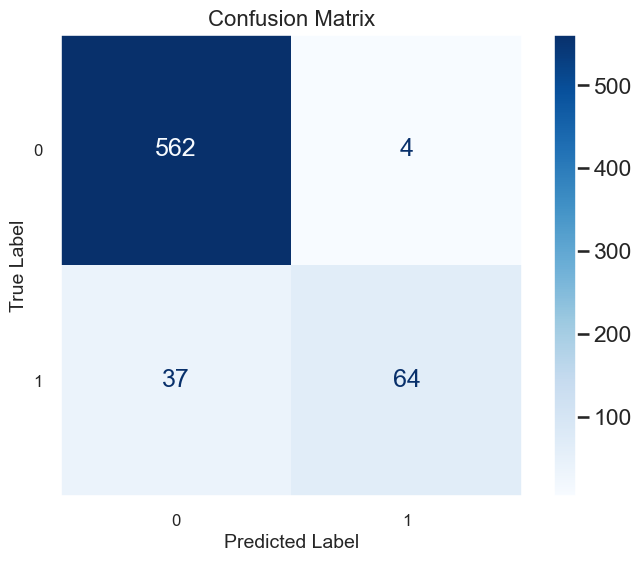

In [28]:
best_model = grid_search.best_estimator_
# Predict on the same data (or you can use a separate test set)
y_pred = best_model.predict(X_test_1)
# Plot the confusion matrix
# Plot the confusion matrix with additional customization
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_test_1, 
    y_pred, 
    ax=ax, 
    cmap='Blues',  # You can choose a different colormap
    colorbar=True
)

# Add titles and labels
ax.set_title('Confusion Matrix', fontsize=16)
ax.set_xlabel('Predicted Label', fontsize=14)
ax.set_ylabel('True Label', fontsize=14)

# Remove the grid
ax.grid(False)

# Adjust tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.show()

# Feature Importance


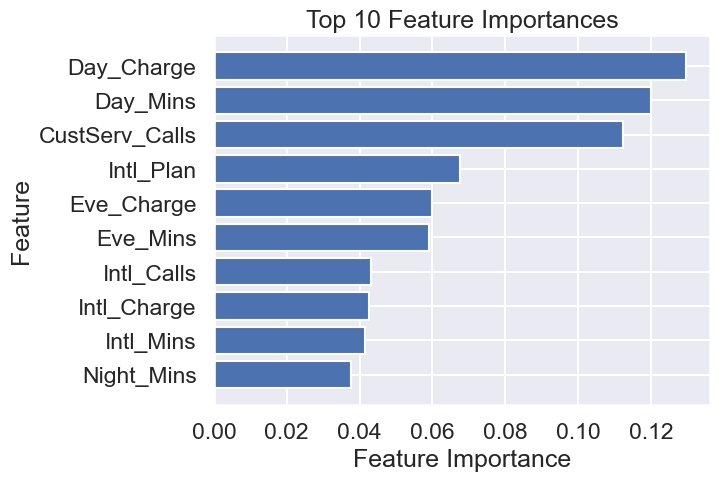

In [33]:
# Get the best model

# Calculate feature importances
importances = best_model.feature_importances_

# Sort importances in descending order and select the top 10
sorted_index = np.argsort(importances)[-10:]
top_importances = importances[sorted_index]
top_labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot for the top 10 features
plt.barh(range(10), top_importances, tick_label=top_labels)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()